In [ ]:
# Convert dataset to pandas dataframes
import pandas as pd
data = pd.read_csv("/content/nyt1.csv")
data.shape

(458441, 5)

In [ ]:
data.head()


,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [ ]:
data.describe()


,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [ ]:
# Create a new variable 'age_group' to categorize users by age
bins = [0, 20, 40, 50, 65, 110]
labeling = ['20', '20-39', '40-49', '50-64','65+']
data['age_group'] = pd.cut(data.Age, bins, labels =labeling ,include_lowest = True)
data.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,20-39
1,73,1,3,0,1,65+
2,30,0,3,0,1,20-39
3,49,1,3,0,1,40-49
4,47,1,11,0,1,40-49


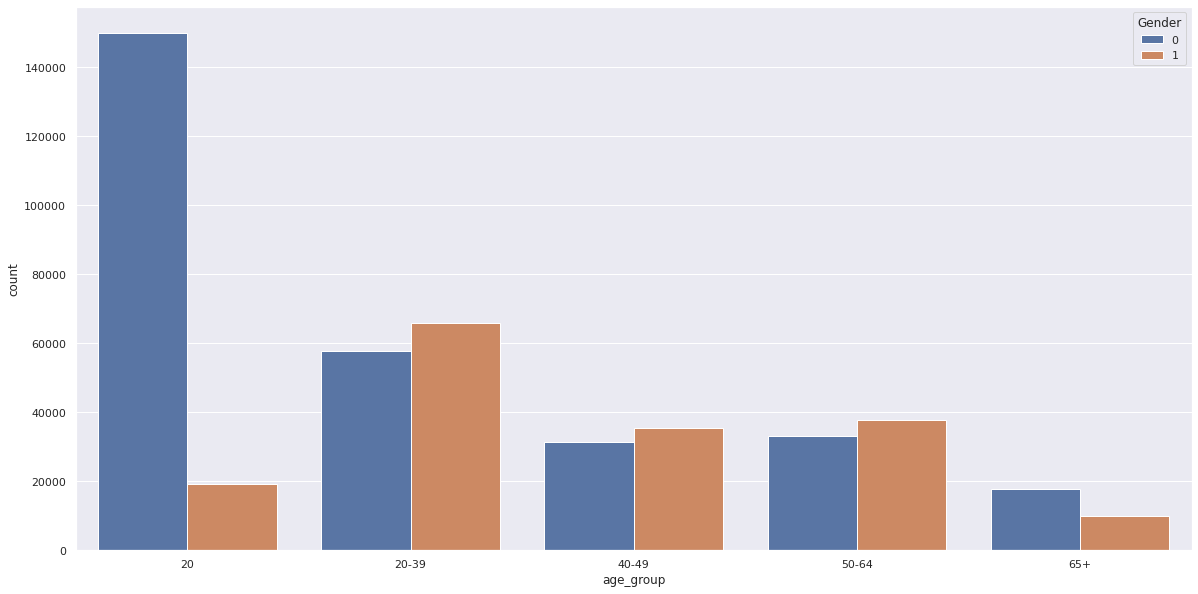

In [ ]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
# Set default theme and figure size
sns.set_theme()
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='age_group', hue='Gender', data=data)

In [ ]:
data[(data['Clicks']>0) & (data['Impressions']==0)].shape[0]


0

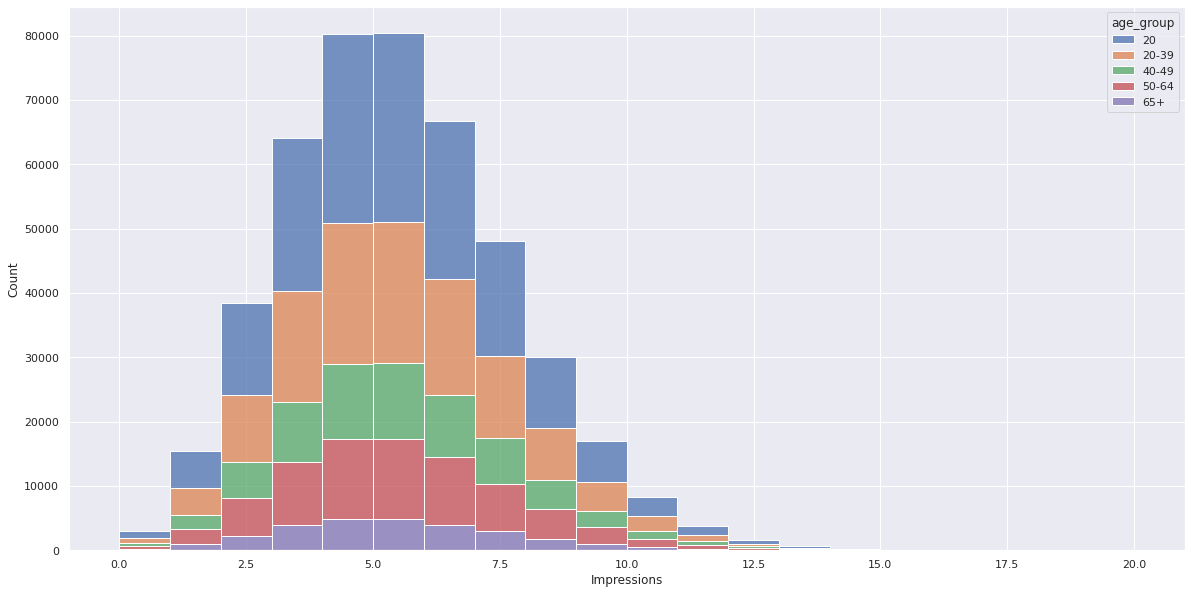

In [ ]:
sns.histplot(data, x='Impressions', hue='age_group', stat='count', binwidth=1, multiple='stack')

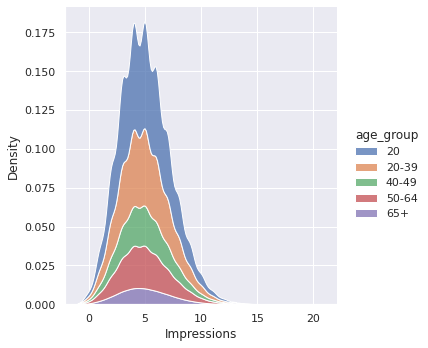

In [ ]:
sns.displot(data, x='Impressions', hue='age_group', kind='kde', bw_adjust=2, multiple='stack')


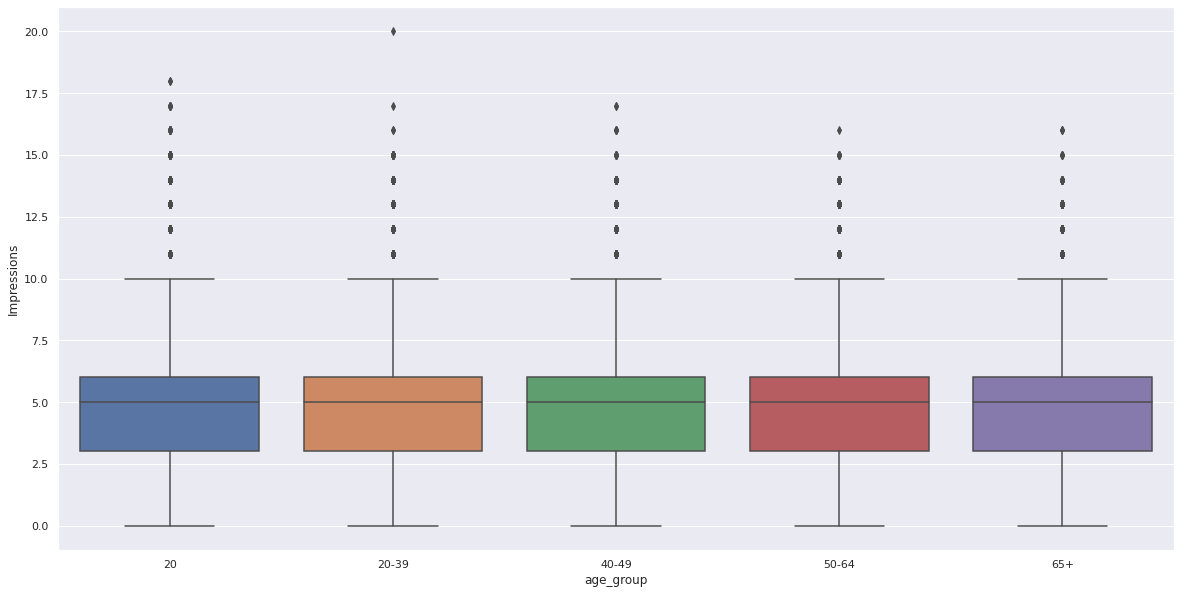

In [ ]:
sns.boxplot(y=data['Impressions'], x=data['age_group'])


In [ ]:
data['CTR'] = round(data['Clicks']/data['Impressions'], 5)


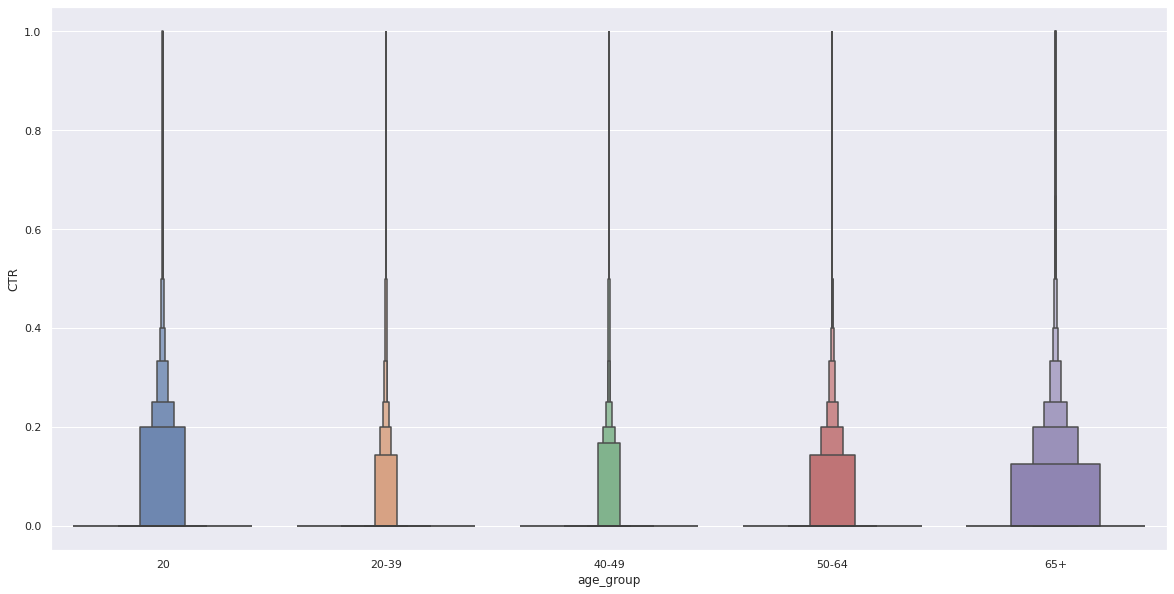

In [ ]:
# Plot the distribution of Click-through rate by age group


sns.boxenplot(x=data['age_group'], y=data['CTR'])


In [ ]:
bins = [-1, 0, 0.1, 0.2, 0.4, 1]
labels = ['0', '<10%', '10%-20%', '20%-40%', '>40%']
data['CTR_group'] = pd.cut(data.CTR, bins, labels = labels,include_lowest = True)
data.CTR_group.value_counts(normalize=True, sort=True)


0          0.912516
10%-20%    0.054654
20%-40%    0.023328
<10%       0.004996
>40%       0.004506
Name: CTR_group, dtype: float64

In [ ]:
df_Clicked = data[data['CTR'] > 0]
df_Clicked.head()
df_Clicked.shape

(39838, 8)

In [ ]:
df_Clicked.age_group.value_counts(normalize=True)


20       0.520483
20-39    0.153672
50-64    0.142703
65+      0.099152
40-49    0.083990
Name: age_group, dtype: float64

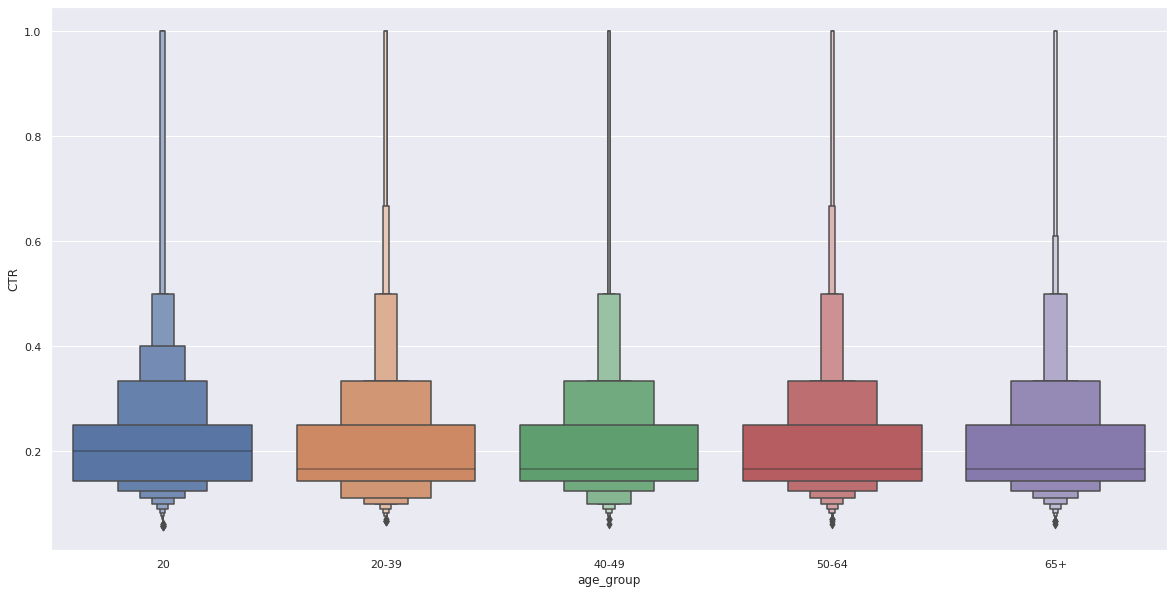

In [ ]:
sns.boxenplot(x=df_Clicked['age_group'], y=df_Clicked['CTR'])


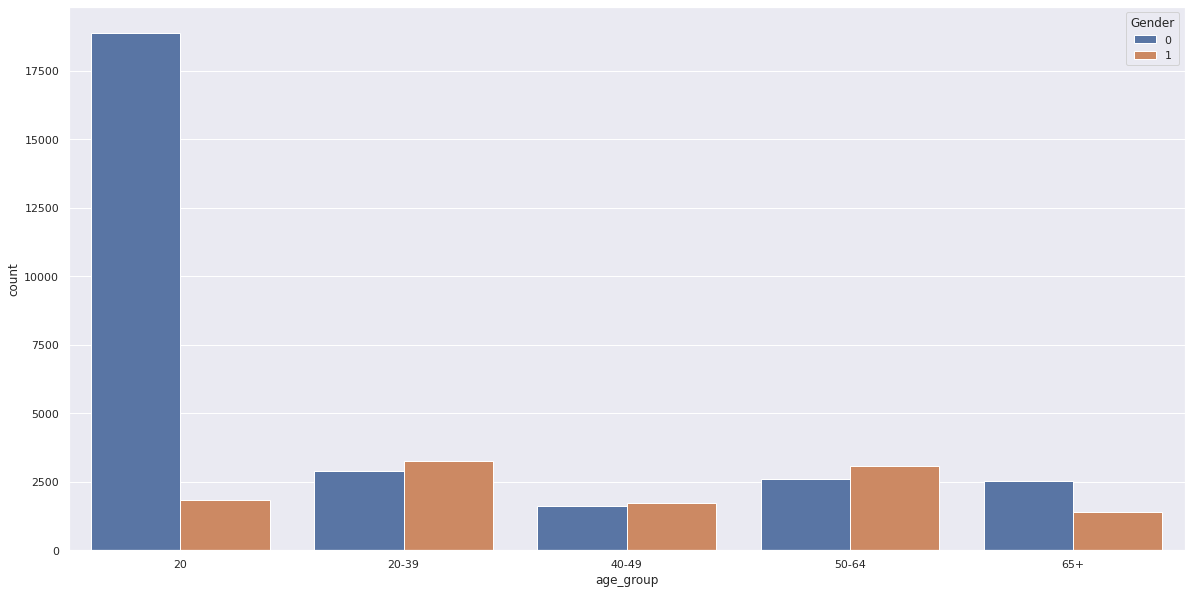

In [ ]:

sns.countplot(x='age_group', hue='Gender', data=df_Clicked)


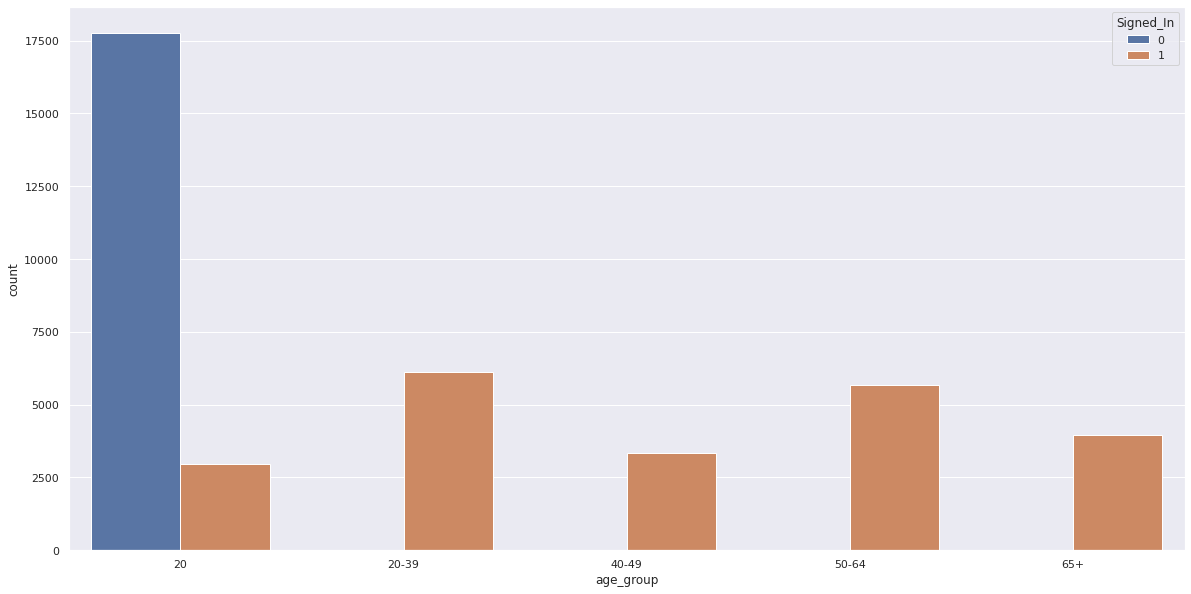

In [ ]:
sns.countplot(x='age_group', hue='Signed_In', data=df_Clicked)


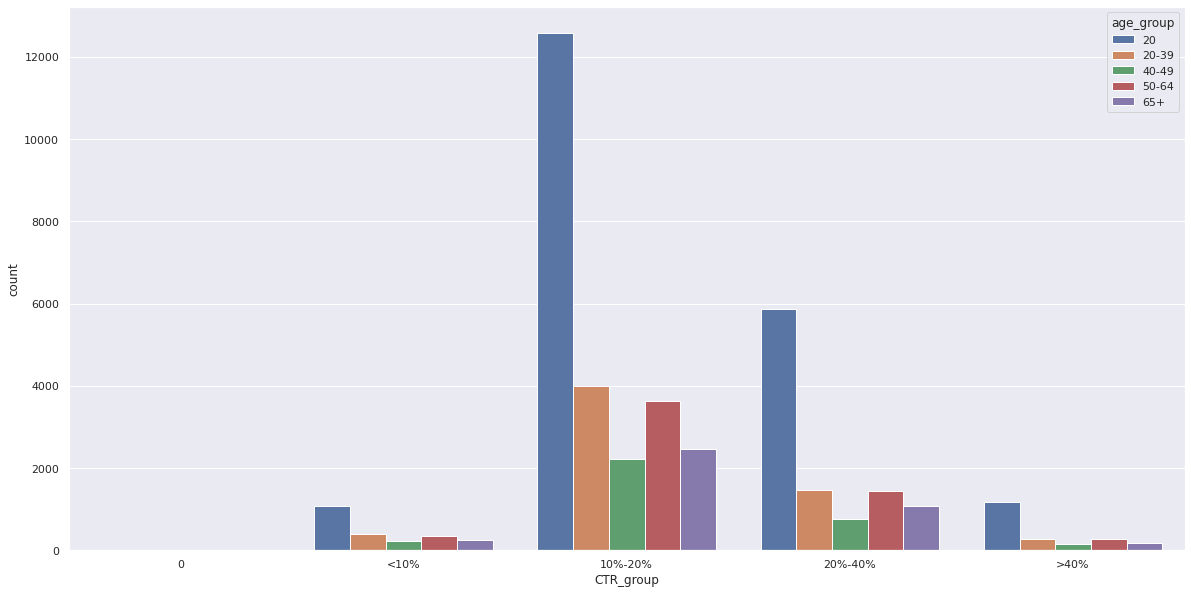

In [ ]:
sns.countplot(x='CTR_group', hue='age_group', data=df_Clicked)


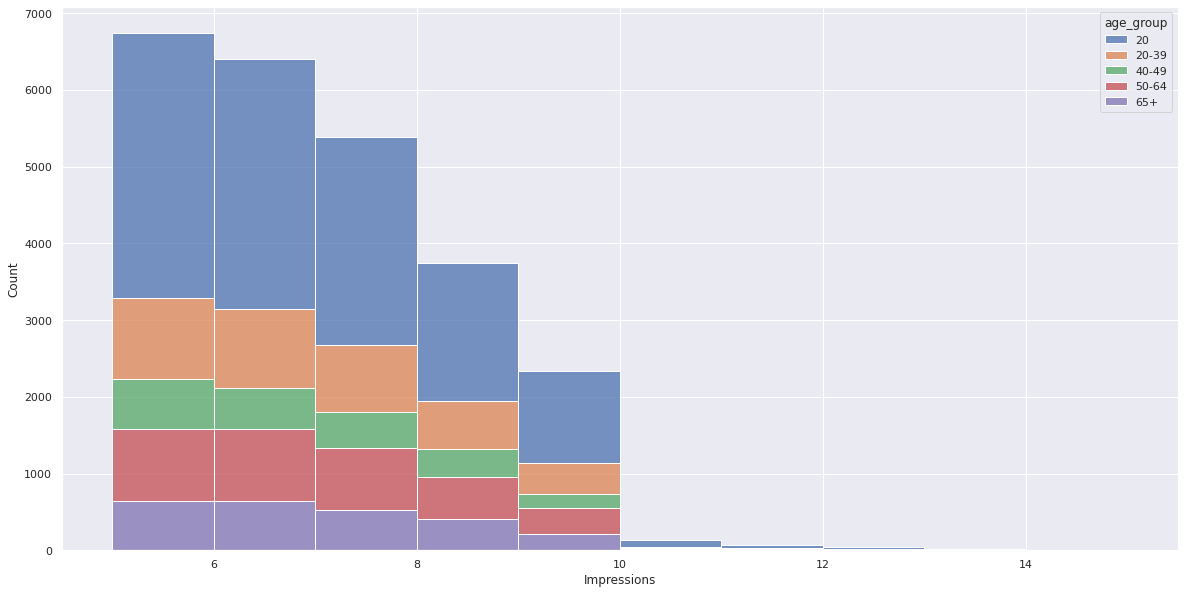

In [ ]:
df_Clicked1020 = df_Clicked[df_Clicked['CTR_group'] == '10%-20%']
# Plot the distribution of impressions by age group 
sns.histplot(df_Clicked1020, x='Impressions', hue='age_group', binwidth=1, stat='count', multiple='stack')

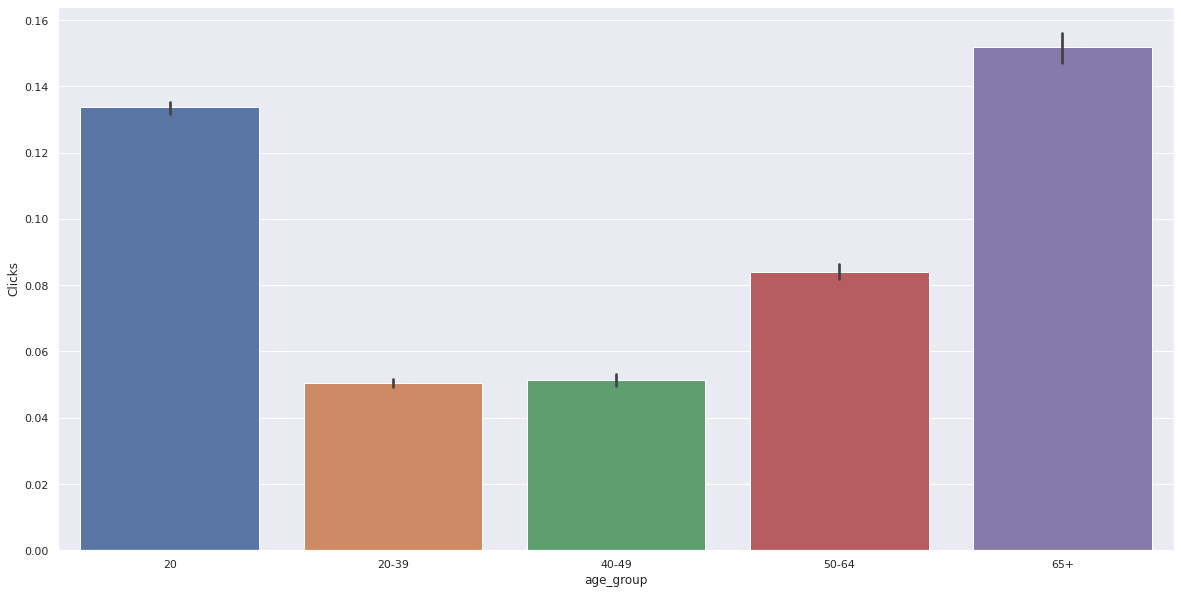

In [ ]:
sns.barplot(x = 'age_group',
            y = 'Clicks',
            data = data)
 

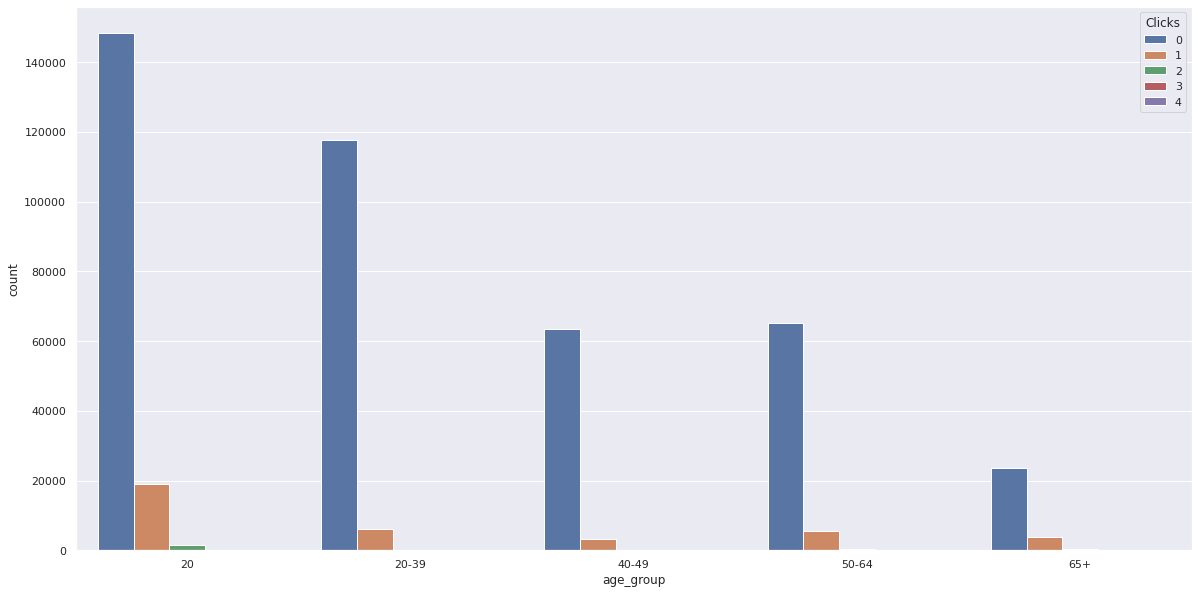

In [ ]:
sns.countplot(x='age_group' , hue='Clicks', data=data)
